### Locally weighted regression using normal equation with regularization

In [329]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


input_data = pd.read_csv('/home/ram/data_sets/ML/Housing Price data set.csv')
input_data.replace(to_replace=['yes', 'no'], value=[1, 0], inplace=True)
# print(input_data.columns)

In [330]:
X = pd.DataFrame(input_data[['lotsize']])
M = int(len(X)) 
no_of_features = len(X.columns)
X_org = X.values.reshape(M, no_of_features)
y = np.array(input_data['price']).reshape(M, 1)
# print(X)

#normalization
norms_x = np.linalg.norm(X_org, axis=0)
X = pd.DataFrame(X_org)
# print(X)
X0 = np.ones(len(input_data)) # constant vector for intecept
X.insert(0, "X0", X0, True) 
no_of_features = len(X.columns)
no_of_features

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5,random_state = 101)
X_test = X_test[0]


In [348]:

t = 0.005 #tau to be used in finding gama
lamda = 1e0 #regularization parameter

def find_gama(x, X, tau):
    gama = np.eye(len(X), len(X))
    i = 0
    for xi in X:
        gi = math.exp( -((xi - x) **2) / 2 * (tau **2) )
        gama[i][i] = gama[i][i] * gi
#         print(gama[i][i])
        i += 1
    return gama

#normal equation with regularization => W = (X.T * gama * X + lambda)^-1 * (X.T * gama * y)
# x = int(input())
Yi = []
W = 0
for x in X_test:
    gama = find_gama(x, X_train[0], t)
    XT_gama = X_train.T @ gama
    lamda_mat = np.zeros([no_of_features,no_of_features],dtype = float)

    for i in range(no_of_features):
        if i != 0:
            lamda_mat[i][i] = lamda
#     print(np.dot(XT_gama , X_train))
    W = np.linalg.pinv(np.add(np.dot(XT_gama , X_train), lamda_mat)) @ (XT_gama @ y_train)
    Yi.append(W[0][0] + W[0][1]*x)

from sklearn.metrics import r2_score
print("Accuracy: ",float(r2_score(y_test, Yi)) * 100, end='\n')

from sklearn.metrics import mean_squared_error
print("error: ", math.sqrt(mean_squared_error(y_test, Yi)))


Accuracy:  31.055854848069863
error:  21771.761013383486


Text(0.5, 1.0, 'Line of Regression')

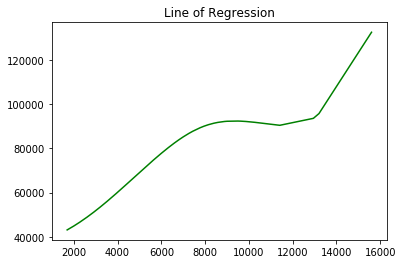

In [332]:
res = pd.DataFrame(zip(X_test, Yi))
res = res.sort_values(0)
res.rename(columns={0:'x', 1:'y'}, inplace=True)
# plt.scatter(X_train[0], y_train)
plt.plot(res['x'],res['y'], color = 'green')
plt.title("Line of Regression")